In [1]:
from spacerocks import SpaceRock, Units

import numpy as np

from astropy.time import Time

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
#get rocks from 'distant_extended', which is distant object only
rocks = SpaceRock.from_mpc('distant_extended', download_data=False, metadata='Orbit_type')

In [3]:
units = Units()
units.timescale = 'utc'
date = Time(59726, scale='utc', format='mjd')
prop = rocks.analytic_propagate(epoch=date.jd)
obs = prop.observe(obscode='W84')

In [4]:
def radec2project(ra, dec):
    ra[ra>180] -= 360
    return (-np.radians(ra), np.radians(dec))

[Text(-2.6179938779914944, 0, '150'),
 Text(-2.0943951023931953, 0, '120'),
 Text(-1.5707963267948966, 0, '90'),
 Text(-1.0471975511965976, 0, '60'),
 Text(-0.5235987755982988, 0, '30'),
 Text(0.0, 0, '0'),
 Text(0.5235987755982988, 0, '-30'),
 Text(1.0471975511965976, 0, '-60'),
 Text(1.5707963267948966, 0, '-90'),
 Text(2.0943951023931953, 0, '-120'),
 Text(2.6179938779914944, 0, '-150')]

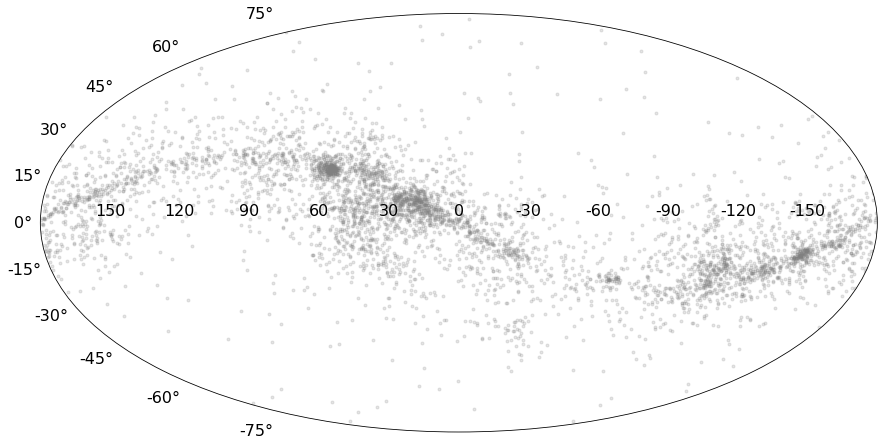

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111, projection="mollweide")
x, y = radec2project(obs.ra.deg, obs.dec.deg)
ax.scatter(x, y, marker='.',color='grey', alpha=0.2)
ax.set_xticklabels((150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150))

In [6]:
#slice orbits to get Neptune Trojans
NT = (rocks.a.au < 30.8) &  (rocks.a.au > 29.3) &(rocks.e < 0.13)
NTs = rocks[NT]
prop_nt = NTs.analytic_propagate(epoch=date.jd)
obs_nt = prop_nt.observe(obscode='W84')

[Text(-2.6179938779914944, 0, '150'),
 Text(-2.0943951023931953, 0, '120'),
 Text(-1.5707963267948966, 0, '90'),
 Text(-1.0471975511965976, 0, '60'),
 Text(-0.5235987755982988, 0, '30'),
 Text(0.0, 0, '0'),
 Text(0.5235987755982988, 0, '-30'),
 Text(1.0471975511965976, 0, '-60'),
 Text(1.5707963267948966, 0, '-90'),
 Text(2.0943951023931953, 0, '-120'),
 Text(2.6179938779914944, 0, '-150')]

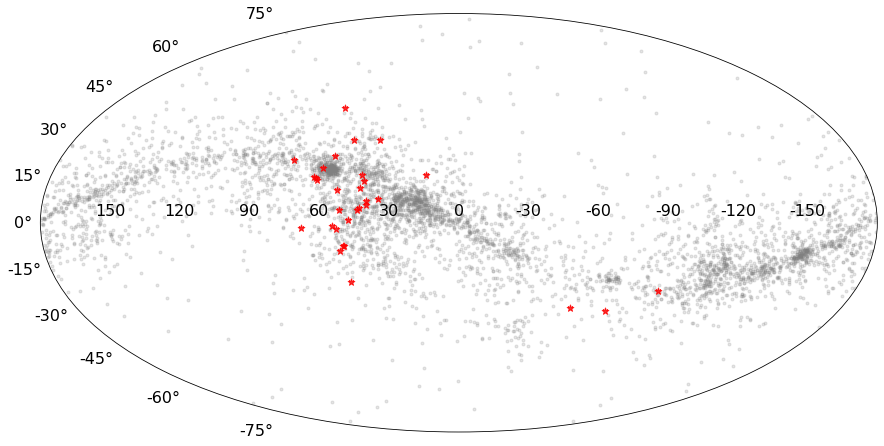

In [7]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111, projection="mollweide")
x, y = radec2project(obs.ra.deg, obs.dec.deg)
ax.scatter(x, y, marker='.',color='grey', alpha=0.2)
x, y = radec2project(obs_nt.ra.deg, obs_nt.dec.deg)
ax.scatter(x, y, marker='*',color='r', s=50, alpha=.8)
ax.set_xticklabels((150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150))

In [ ]:
#to get Jovian Trojan, we need to load the full set of mpcorb
rocks_full = SpaceRock.from_mpc('mpcorb_extended', download_data=False, metadata='Orbit_type')

In [ ]:
#we can slice or use orbit_type
JT = rocks_full[rocks_full.Orbit_type == 'Jupiter Trojan']
prop_jt = JT.analytic_propagate(epoch=date.jd)
obs_jt = prop_jt.observe(obscode='W84')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111, projection="mollweide")
x, y = radec2project(obs.ra.deg, obs.dec.deg)
ax.scatter(x, y, marker='.',color='gold', alpha=0.5, label='distant object')
x, y = radec2project(obs_jt.ra.deg, obs_jt.dec.deg)
ax.scatter(x, y, marker='x',color='skyblue', s=50, alpha=.25, label='Jovian Trojan')
x, y = radec2project(obs_nt.ra.deg, obs_nt.dec.deg)
ax.scatter(x, y, marker='*',color='violet', s=50, alpha=1, label='Neptune Trojan')
ax.set_xticklabels((150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150))
plt.grid(True)
ax.legend(loc=1)